In [1]:
import h5py
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib.patches as patches
sns.set_style('darkgrid')
import pickle
from sklearn.utils import shuffle
from matplotlib import gridspec
from matplotlib.lines import Line2D

# Machine learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
def bsc_from_esd_eac(esd, eac, f, c = 1500):
    # gaussian form factor
    eac = 10 ** (eac / 10.0)
    esd = esd * 1e-4
    c = c * 1e-4
    C = np.pi  **4 /36
    wl = (f/c) ** 4
    bsc = C * wl * (esd **6) * eac * np.exp(-0.827 * (np.pi **2)* (esd **2) * ((f/c)**2))
    
    return bsc

In [39]:
f1 = np.linspace( 3, 10, 100)

In [40]:
bsc1 = bsc_from_esd_eac(31, 38, f1)
bsc2 = bsc_from_esd_eac(17, 63, f1)

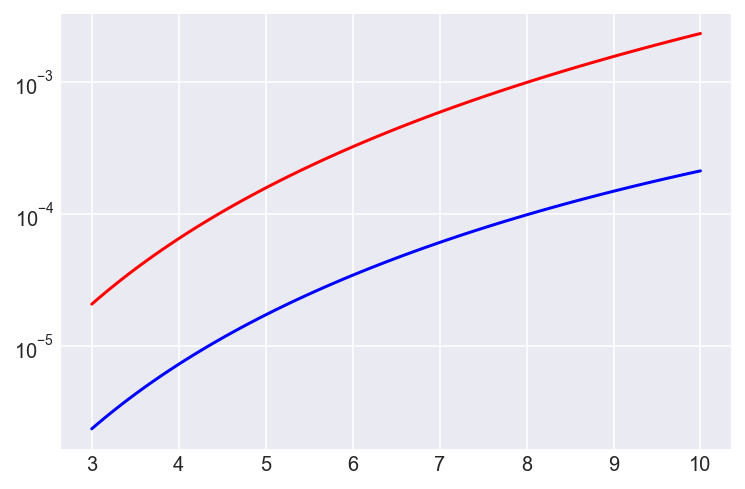

In [41]:
plt.semilogy(f1, bsc1, 'b')
plt.semilogy(f1, bsc2, 'r')

In [42]:
f = np.linspace( 3, 5, 100)

In [43]:
bsc3 = bsc_from_esd_eac(153, 27, f)
bsc4 = bsc_from_esd_eac(208, 17, f)

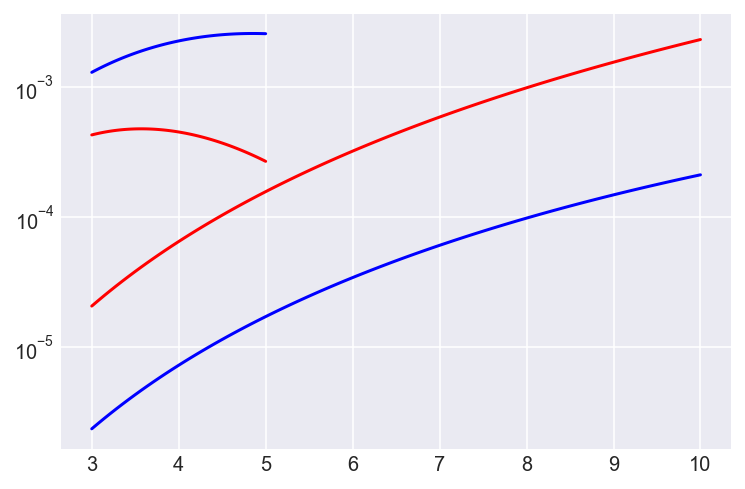

In [45]:
plt.semilogy(f1, bsc1, 'b')  # low
plt.semilogy(f1, bsc2, 'r') # high

plt.semilogy(f, bsc3, 'b') # low
plt.semilogy(f, bsc4, 'r') # high